# **SpaceX Falcon 9 Data Undertanding and Feature Engineering**
IMB's Applied Data Science Capstone Project


- After wrangling the data, we can understanding the pattern between variables that affacts landing outcome through ploting it.
- then turn the categorical data into dummies variables for ML steps

  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

### Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("/Users/fanzhaoting/Brian_code/coursera_dspythonclass/falcon/data/Falcon_dataset.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv
pd.set_option('display.max_columns', None)
#/Users/fanzhaoting/Brian_code/coursera_dspythonclass/falcon/Falcon_dataset.csv
df

,FlightNumber,Date,BoosterVersion,LaunchSite,Payload,PayloadMass,Orbit,Customer,LaunchOutcome,LandingOutcome,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,F9 v1.0,CCSFS SLC 40,Dragon Spacecraft Qualification Unit,6124,LEO,SpaceX,Success,Failure,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,F9 v1.0,CCSFS SLC 40,SpaceX COTS Demo Flight 2,525,LEO,NASA,Success,No attempt,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,F9 v1.0,CCSFS SLC 40,SpaceX CRS-2,677,ISS,NASA,Success,No attempt,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,F9 v1.1,VAFB SLC 4E,CASSIOPE,500,PO,MDA,Success,Uncontrolled,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,F9 v1.1,CCSFS SLC 40,SES-8,3170,GTO,SES,Success,No attempt,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,86,2020-09-03,F9 B5B1060.2,KSC LC 39A,Starlink,15600,VLEO,SpaceX,Success,Success,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,12,B1060,-80.603956,28.608058,1
85,87,2020-10-06,F9 B5B1058.3,KSC LC 39A,Starlink,15600,VLEO,SpaceX,Success,Success,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,13,B1058,-80.603956,28.608058,1
86,88,2020-10-18,F9 B5B1051.6,KSC LC 39A,Starlink,15600,VLEO,SpaceX,Success,Success,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,12,B1051,-80.603956,28.608058,1
87,89,2020-10-24,F9 B5,CCSFS SLC 40,Starlink,15600,VLEO,SpaceX,Success,Success,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,12,B1060,-80.577366,28.561857,1


### From the heatmap, we can see **Block** has influential effects on the outcome, The larger the block, the larger the class is

In [3]:
df['PayloadMass'] = pd.to_numeric(df['PayloadMass'])
df['Block'] = pd.to_numeric(df['Block'])

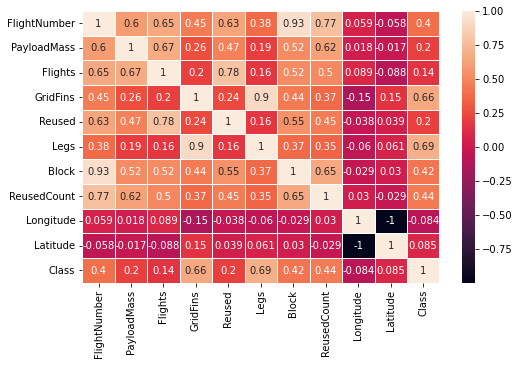

In [14]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot=True,linewidth=.5)
plt.show()

#### `FlightNumber` vs `Payload`
 We see that as the **flight number increases, the first stage is more likely to land successfully**. The payload mass is also important; it seems the **more massive the payload, the less likely the first stage will return**.


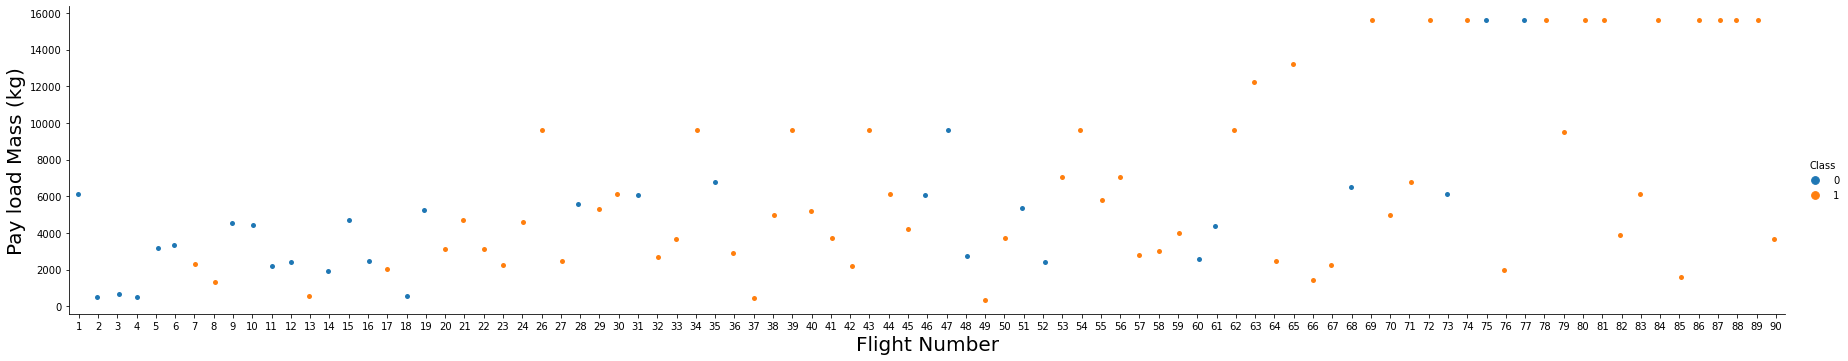

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

####  `Launch site` vs Flight Number
We see that different launch sites have different success rates. **<code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> seems to have higher success rate** than CCAFS LC-40.

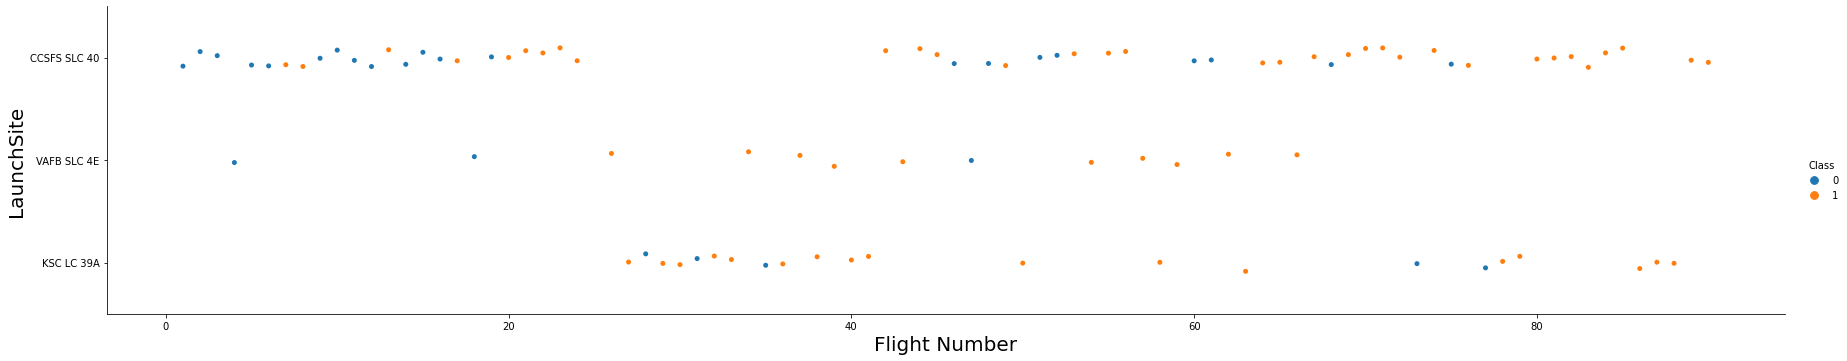

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

#### Payload Vs. Launch Site 
 `VAFB-SLC`  launchsite there are no rockets  launched for  heavypayload mass(greater than 10000).

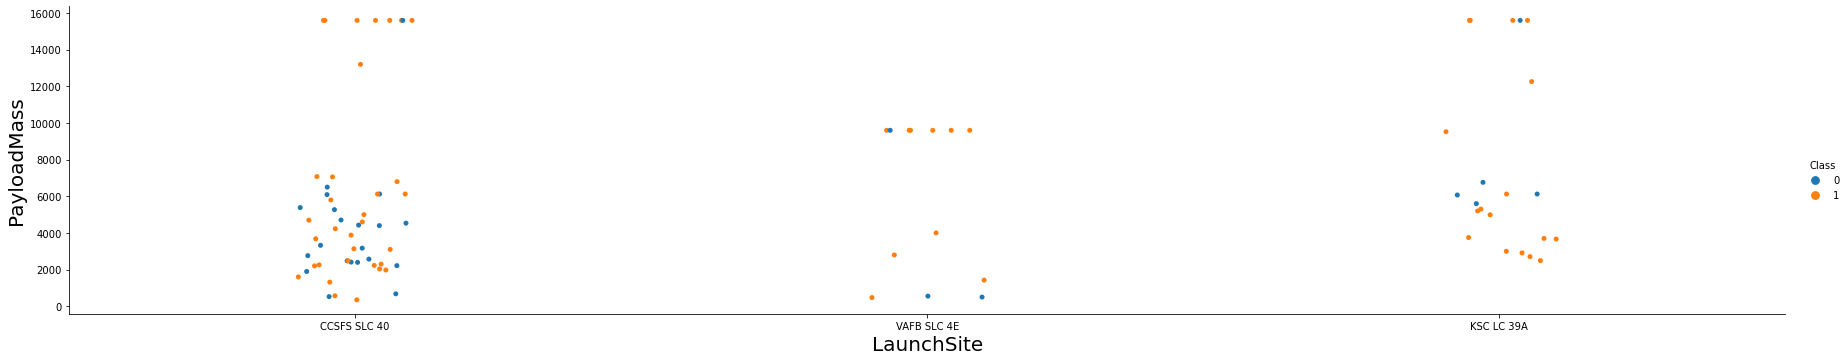

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

###  success rate of each `orbit type`
 found that `Es-L1, GEO, HEO, SSO` have raletively higher rate.

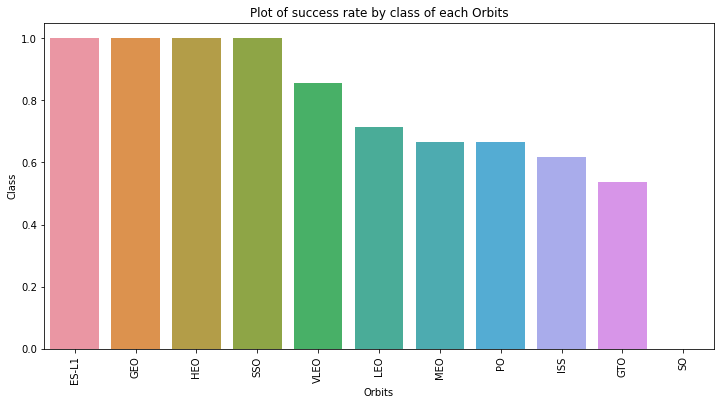

In [9]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success_rate = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()

fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=orbit_success_rate)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

plt.show()

### FlightNumber and `Orbit type`
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

we realized that in the **LEO orbit the Success appears related to the number of flights**; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

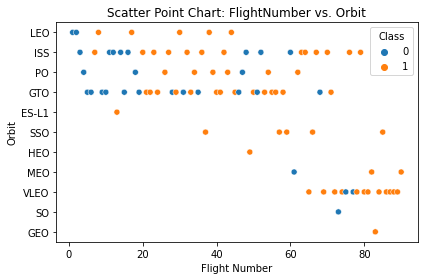

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

plt.title('Scatter Point Chart: FlightNumber vs. Orbit')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Class')

plt.tight_layout()
plt.show()

### Payload vs Orbit type

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

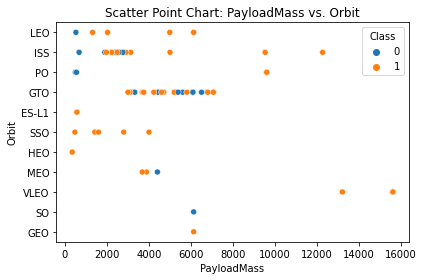

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

plt.title('Scatter Point Chart: PayloadMass vs. Orbit')
plt.xlabel('PayloadMass')
plt.ylabel('Orbit')
plt.legend(title='Class')

plt.tight_layout()
plt.show()

### Visualize the launch success yearly trend


In [11]:
date = df["Date"]

def Extract_year(date):
    year = []  # Initialize the year list
    for i in date:
        year.append(i.split("-")[0])
    return year

years = Extract_year(date)
print(len(years))

89


In [12]:
success_rate = df.groupby(years)["Class"].mean()
success_rate

2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.714286
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

## Features Engineering 


By now, we have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6124,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004


 ### Create dummy variables to categorical columns


In [17]:
features_one_hot = pd.get_dummies(features)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6124,1,False,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525,1,False,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677,1,False,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500,1,False,False,False,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170,1,False,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,86,15600,2,True,True,True,5,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
85,87,15600,3,True,True,True,5,13,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
86,88,15600,6,True,True,True,5,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
87,89,15600,3,True,True,True,5,12,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [18]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
# Verify the data types of the DataFrame
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 79, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


In [19]:
features_one_hot.to_csv('data/falconml_data.csv', index=False)